In [1]:
import requests
import json
import os
from dotenv import load_dotenv
from pathlib import Path


load_dotenv('logstuff.env')


username = os.environ.get('user')
password = os.environ.get('password')

app_id = os.environ.get('app_id')
secret = os.environ.get('secret')
useragent = 'pyDaddy/0.0.1'

auth = requests.auth.HTTPBasicAuth(app_id, secret)

print(auth)

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': username,
        'password': password}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': useragent}

# send our request for an OAuth token
authresponse = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = authresponse.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

print(authresponse)

<Response [200]>


In [2]:
authresponse.json()

{'access_token': '22158216-_OsLByahU_z_oKEXnfoTqZAMa9sy6w',
 'token_type': 'bearer',
 'expires_in': 3600,
 'scope': '*'}

In [3]:
response = requests.get("https://oauth.reddit.com/r/politics/hot",
                   headers=headers)

print(response)
print(response.json())  # let's see what we get


<Response [200]>
{'kind': 'Listing', 'data': {'after': 't3_tljbcs', 'dist': 27, 'modhash': None, 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'politics', 'selftext': 'President Biden is expected to speak at 1:30 PM Eastern at a news conference at NATO’s headquarters following an extraordinary meeting of NATO leaders to discuss responses to the Russian invasion of Ukraine.\n\n[Watch Here](https://www.nato.int/cps/en/natohq/events_67375.htm)', 'author_fullname': 't2_onl9u', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'Discussion Thread: President Biden news conference at NATO HQ', 'link_flair_richtext': [{'e': 'text', 't': 'Discussion'}], 'subreddit_name_prefixed': 'r/politics', 'hidden': False, 'pwls': 6, 'link_flair_css_class': 'discussion', 'downs': 0, 'thumbnail_height': None, 'top_awarded_type': None, 'hide_score': False, 'name': 't3_tmq17g', 'quarantine': False, 'link_flair_text_color': 'dark', 

In [4]:
count = 0

for post in response.json()['data']['children']:
    print(post['data']['title'])
    print('\n')
    count += 1
    
    
print(count)

Discussion Thread: President Biden news conference at NATO HQ


We’re the League of Women Voters and VoteRiders! AUA about Voter ID for Women’s History Month!


Marjorie Taylor Greene branded ‘insurrectionist’ in lawsuit trying to stop her running for reelection


Ted Cruz caught checking his Twitter mentions by photographer after Supreme Court hearing tirade


Marjorie Taylor Greene Unfit for Office, Suit Claims, Citing Jan. 6 Support


Ted Cruz photographed checking his Twitter mentions immediately after aggressive questioning of SCOTUS nominee


Read the Full Text of Mark Pomerantz’s Resignation Letter - The former prosecutor who investigated Donald J. Trump believed that the former president was “guilty of numerous felony violations.”


Jackson Confirmation Hearing Proves GOP Has No Interest Whatsoever in Making America a Better Place


Donald Trump sues Hillary Clinton, others over Russian collusion allegations


Lawsuit claims Trump supporters conduct armed door to door visits to

In [5]:
import praw
# import print

reddit = praw.Reddit(
    client_id=app_id,
    client_secret=secret,
    user_agent=useragent,
    username=username,
    password=password
)
print(reddit) # Output: True

In [6]:
from datetime import datetime
import pandas as pd
from praw.models import MoreComments

url = "https://www.reddit.com/r/worldnews/comments/ti0564/link_found_between_vaccine_resistance_sympathy/"
submission = reddit.submission(url=url)

df = pd.DataFrame(columns = ['Name', 'TotalKarma', 'CommentKarma', 'DateTime', 'AdjustedKarma', 'AdjustedKarmaPercent'])

for comment in submission.comments:
    try:
        if isinstance(comment, MoreComments):
            continue
        if comment.author is None:
                continue
        elif comment.author.comment_karma == 0:
                continue
        else:
            timestamp = comment.author.created_utc
            convertedDate = datetime.fromtimestamp(timestamp)
            df = df.append({'Name' : comment.author, 'TotalKarma' : comment.author.comment_karma, 'CommentKarma' : comment.score, 
                            'DateTime' : convertedDate, 'AdjustedKarma' : -(comment.score - comment.author.comment_karma),
                           'AdjustedKarmaPercent' : comment.score / comment.author.comment_karma}, ignore_index = True)
    
            print(str(comment.author) + " " + str(comment.author.comment_karma) + " " + str(comment.score) + " " + str(convertedDate))
    except AttributeError:
        print("Attribute error for " + str(comment))
        continue
    
df.head()

Attribute error for i1ax92u
lubeste 4954 515 2018-11-30 00:29:34
RbnMTL 5665 4211 2014-12-28 14:09:57
SpicyPandaBalls 74197 1962 2021-07-01 09:12:10
namesTaken_gfsdgfdsg 1088 834 2022-03-10 06:18:36
H3r0d0tu5 7093 39 2019-06-20 09:14:43
_esistgut_ 1404 353 2015-04-01 09:37:40
DigitalHemlock 18954 154 2018-12-07 22:26:45
LegatoSkyheart 175779 10 2012-09-26 11:45:37
MaxiqueBDE 75031 168 2020-01-03 15:42:09
Lockelamora6969 9132 185 2022-01-30 08:41:26
Bleezy79 44688 7 2011-11-09 17:41:23
Thunder_Gun_Xpress 10253 7 2022-02-21 12:22:55
SpikeRosered 275587 6 2012-11-17 21:12:18
JarekBloodDragon 223635 6 2012-02-21 00:22:46
lanaem1 24782 87 2019-05-01 15:26:00
TONEandBARS 15264 5 2011-06-10 23:37:32
LordMaroons 10244 4 2014-05-29 10:25:58
Goferprotocol 30835 48 2012-08-16 12:50:55
heathers1 119403 34 2017-01-21 18:56:59
puremath369 3874 4 2015-01-25 15:39:01
Fuzzyfoot12345 30236 5 2015-09-17 07:56:45
wonderboywilliams 15482 4 2020-01-27 14:08:33
TheRealFrankCostanza 56120 4 2018-08-10 22:38:0

,Name,TotalKarma,CommentKarma,DateTime,AdjustedKarma,AdjustedKarmaPercent
0,lubeste,4954,515,2018-11-30 00:29:34,4439,0.103956
1,RbnMTL,5665,4211,2014-12-28 14:09:57,1454,0.743336
2,SpicyPandaBalls,74197,1962,2021-07-01 09:12:10,72235,0.026443
3,namesTaken_gfsdgfdsg,1088,834,2022-03-10 06:18:36,254,0.766544
4,H3r0d0tu5,7093,39,2019-06-20 09:14:43,7054,0.005498


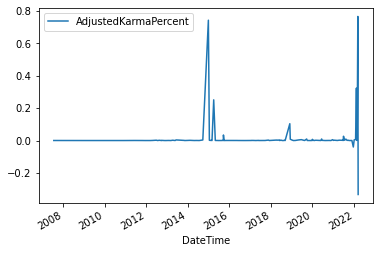

In [7]:
import matplotlib.pyplot as plt
plt.close("all")


yAxis = pd.Series(df['AdjustedKarmaPercent'])
xAxis = pd.Series(df['DateTime'])

ts = pd.Series(yAxis, index = xAxis)
ts.head()

sortdf = df.sort_values(by=['DateTime'])

sortdf.plot(x = 'DateTime', y = 'AdjustedKarmaPercent')
plt.gcf().autofmt_xdate()
plt.show()



In [8]:
from datetime import datetime, timedelta

today = datetime.now()
start_date = today - timedelta(days = 30)
end_date = today

condition = (sortdf['DateTime'] >= start_date) & (sortdf['DateTime'] <= end_date)
newAccounts = sortdf.loc[condition]
newAccounts.head(150)

,Name,TotalKarma,CommentKarma,DateTime,AdjustedKarma,AdjustedKarmaPercent
68,RichWaste6959,100,2,2022-02-23 17:40:04,98,0.020000
73,safetymole,316,2,2022-02-26 18:09:33,314,0.006329
3,namesTaken_gfsdgfdsg,1088,834,2022-03-10 06:18:36,254,0.766544
108,No_Adhesiveness_6381,-6,2,2022-03-15 23:40:33,-8,-0.333333
103,No_Adhesiveness_6381,-6,2,2022-03-15 23:40:33,-8,-0.333333


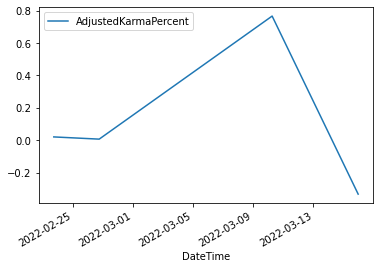

In [9]:
yAxis = pd.Series(newAccounts['AdjustedKarmaPercent'])
xAxis = pd.Series(newAccounts['DateTime'])

ts = pd.Series(yAxis, index = xAxis)
ts.head()


newAccounts.plot(x = 'DateTime', y = 'AdjustedKarmaPercent')
plt.gcf().autofmt_xdate()
plt.show()

In [10]:
response = requests.get("https://oauth.reddit.com/r/politics/hot", headers=headers)

threadList = []


for post in response.json()['data']['children']:
    x = str(post['data']['name'])
    print(x)
    x = x.split('_')
    threadList.append(x[1])

def getSubComments(comment, allComments, verbose=True):

    allComments.append(comment)
    if not hasattr(comment, "replies"):
        replies = comment.comments()
        if verbose: print("fetching (" + str(len(allComments)) + " comments fetched total)")
    else:
        replies = comment.replies
    for child in replies:
        getSubComments(child, allComments, verbose=verbose)    
    
    
def getAll(r, submissionId, verbose=True):
    submission = r.submission(submissionId)
    comments = submission.comments
    commentsList = []
    getSubComments(comment, commentsList, verbose=verbose)
    return commentsList
  

threadList


t3_tmq17g
t3_tmsswg
t3_tmir0k
t3_tm3q9y
t3_tmibo6
t3_tm41lo
t3_tmcsv9
t3_tmlgwf
t3_tmqzfj
t3_tm3yaf
t3_tmcg4w
t3_tm9rm0
t3_tme4ff
t3_tmo0rt
t3_tm41su
t3_tmg0yn
t3_tmsujy
t3_tmehwy
t3_tmup9b
t3_tmjran
t3_tms7j0
t3_tmn19n
t3_tmo44m
t3_tmid9b
t3_tmcbv9
t3_tmxhin
t3_tljbcs


['tmq17g',
 'tmsswg',
 'tmir0k',
 'tm3q9y',
 'tmibo6',
 'tm41lo',
 'tmcsv9',
 'tmlgwf',
 'tmqzfj',
 'tm3yaf',
 'tmcg4w',
 'tm9rm0',
 'tme4ff',
 'tmo0rt',
 'tm41su',
 'tmg0yn',
 'tmsujy',
 'tmehwy',
 'tmup9b',
 'tmjran',
 'tms7j0',
 'tmn19n',
 'tmo44m',
 'tmid9b',
 'tmcbv9',
 'tmxhin',
 'tljbcs']

In [ ]:
#res = getAll(reddit, 'tk86b5')
#threadList = threadList[0:1]
print(threadList)

df2 = pd.DataFrame(columns = ['Name', 'TotalKarma', 'CommentKarma', 'DateTime', 'AdjustedKarma', 'AdjustedKarmaPercent'])    


today = datetime.now()
start_date = today - timedelta(days = 30)

for url in threadList:
    print('tick')
    res = reddit.submission(url)
    for comment in res.comments:
        if isinstance(comment, MoreComments):
            continue
        try:
            timestamp = comment.author.created_utc
            convertedDate = datetime.fromtimestamp(timestamp)
            if comment.author is None:
                continue
            elif comment.author.comment_karma == 0:
                continue
            #elif convertedDate <= start_date:
                #print(convertedDate)
                #continue
            else:
                df2 = df2.append({'Name' : comment.author, 'TotalKarma' : comment.author.comment_karma, 'CommentKarma' : comment.score, 
                        'DateTime' : convertedDate, 'AdjustedKarma' : -(comment.score - comment.author.comment_karma),
                        'AdjustedKarmaPercent' : comment.score / comment.author.comment_karma}, ignore_index = True)
        except AttributeError:
            print("Attribute error for " + str(comment))
            continue


        
    
df2.head(500)

['tmq17g', 'tmsswg', 'tmir0k', 'tm3q9y', 'tmibo6', 'tm41lo', 'tmcsv9', 'tmlgwf', 'tmqzfj', 'tm3yaf', 'tmcg4w', 'tm9rm0', 'tme4ff', 'tmo0rt', 'tm41su', 'tmg0yn', 'tmsujy', 'tmehwy', 'tmup9b', 'tmjran', 'tms7j0', 'tmn19n', 'tmo44m', 'tmid9b', 'tmcbv9', 'tmxhin', 'tljbcs']
tick
Attribute error for i1yjuy1
Attribute error for i1z41xh
tick
Attribute error for i1ynsrt
Attribute error for i1ym9cb
tick


In [ ]:
print(len(df2))

In [ ]:
df2.to_csv('out.csv')